In [1]:
import numpy as np
from threeflavorALLvalues import allSigmas, chiral
from scipy.integrate import odeint
from solveTmu import blackness

import matplotlib.pyplot as plt




In [2]:
T=120
mu=0
ml=0.47560557155787747
minsigma=0
maxsigma=300
a0=0
lambda1=7

args=(T,mu,ml,minsigma,maxsigma,a0,lambda1)
sigmas=allSigmas(args)

In [3]:
sigmas

array([ 45., 112., 261.])

d0 is 0.0909264945110821


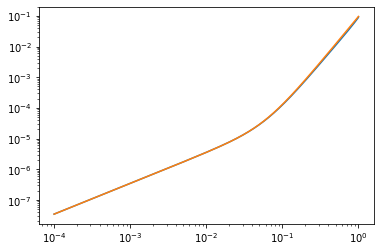

In [5]:
v4=4.2
v3= -22.6/(6*np.sqrt(2))

mu_g=440
a0=0
zh,q = blackness(T,mu)

zeta=np.sqrt(3)/(2*np.pi)

ui=1e-4
uf=1-ui
u=np.linspace(ui,uf,1000)
params=v3,v4,lambda1,mu_g,a0,zh,q

sl=105.3

s2=-3*(ml*zeta)**2*v3
s3=-9*(zeta*ml)**3*v3**2 + 2*(zeta*ml)**3*v4 + ml*zeta*mu_g**2 - 1/2*ml*zeta*lambda1*mu_g**2

#use this line if deltasig is an integer
# for sl in range (minsigma,maxsigma,deltasig):

#use these next two lines if deltasig is not an integer

"values for chiral field and derivative at UV boundary"
sigmal = sl**3
UVbound = [ml*zeta*zh*ui + sigmal/zeta*(zh*ui)**3+s2*(zh*ui)**2+s3*(zh*ui)**3*np.log(zh*ui), 
            ml*zeta*zh + 3*sigmal/zeta*zh**3*ui**2 + 2*s2*zh**2*ui + s3* ui**2*zh**3*(1+3*np.log(zh*ui))]
    
"solve for the chiral field"
chiFields=odeint(chiral,UVbound,u,args=(params,))

chi=chiFields[:,0]
chiPrime=chiFields[:,1]
print("d0 is", chi[-1])
plt.loglog(u,chi)
plt.loglog(u, ml*zeta*zh*u+sigmal/zeta*(zh*u)**3)
plt.show()
